In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [18]:
url = 'https://www.worldometers.info/coronavirus/'

page = requests.get(url)
page

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
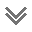

In [19]:
if page.status_code == 200:
    html_doc = page.text
    
soup = BeautifulSoup(html_doc)

print(soup.prettify())

In [21]:
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

print(table.prettify())

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
  <tr>
   <th width="1%">
    #
   </th>
   <th width="100">
    Country,
    <br/>
    Other
   </th>
   <th width="20">
    Total
    <br/>
    Cases
   </th>
   <th width="30">
    New
    <br/>
    Cases
   </th>
   <th width="30">
    Total
    <br/>
    Deaths
   </th>
   <th width="30">
    New
    <br/>
    Deaths
   </th>
   <th width="30">
    Total
    <br/>
    Recovered
   </th>
   <th width="30">
    New
    <br/>
    Recovered
   </th>
   <th width="30">
    Active
    <br/>
    Cases
   </th>
   <th width="30">
    Serious,
    <br/>
    Critical
   </th>
   <th width="30">
    Tot Cases/
    <br/>
    1M pop
   </th>
   <th width="30">
    Deaths/
    <br/>
    1M pop
   </th>
   <th width="30">
    Total
    <br/>
    Tests
   </th>
   <th width="30">
    Tests/
    <br/>
    <nobr>
     1M pop
    <

In [22]:
rows = table.find_all('tr', attrs={'style': ""})
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>629,476,543</td>
 <td

In [27]:
output = []

column_names = ['#','Country Other', 'Total Cases','New Cases', 
                'Total Deaths', 'New Deaths', 'Total Recovered',
               'New Recovered', 'Active Cases', 'Serious Critical',
               'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Test', 
               'Test/1M pop', 'Population']

for cases in rows:
    cases_data = cases.find_all('td')
    if cases_data:
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
output


[{'#': '',
  'Country Other': 'World',
  'Total Cases': '629,476,543',
  'New Cases': '+71,337',
  'Total Deaths': '6,570,302',
  'New Deaths': '+119',
  'Total Recovered': '608,476,864',
  'New Recovered': '+133,559',
  'Active Cases': '14,429,377',
  'Serious Critical': '41,722',
  'Tot Cases/1M pop': '80,756',
  'Deaths/1M pop': '842.9',
  'Total Test': '',
  'Test/1M pop': '',
  'Population': ''},
 {'#': '1',
  'Country Other': 'USA',
  'Total Cases': '98,814,003',
  'New Cases': '',
  'Total Deaths': '1,090,289 ',
  'New Deaths': '',
  'Total Recovered': '96,055,534',
  'New Recovered': '',
  'Active Cases': '1,668,180',
  'Serious Critical': '2,689',
  'Tot Cases/1M pop': '294,843',
  'Deaths/1M pop': '3,253',
  'Total Test': '1,123,688,091',
  'Test/1M pop': '3,352,884',
  'Population': '335,140,742 '},
 {'#': '2',
  'Country Other': 'India',
  'Total Cases': '44,626,427',
  'New Cases': '',
  'Total Deaths': '528,874 ',
  'New Deaths': '',
  'Total Recovered': '44,070,935',
  '

In [28]:
data = pd.DataFrame(output)
data.head()

# Country Other  Total Cases New Cases Total Deaths New Deaths  \
0            World  629,476,543   +71,337    6,570,302       +119   
1  1           USA   98,814,003             1,090,289               
2  2         India   44,626,427               528,874               
3  3        France   36,161,240               155,816               
4  4        Brazil   34,788,500               687,186               

  Total Recovered New Recovered Active Cases Serious Critical  \
0     608,476,864      +133,559   14,429,377           41,722   
1      96,055,534                  1,668,180            2,689   
2      44,070,935                     26,618              698   
3      34,969,865                  1,035,559              869   
4      33,953,433                    147,881            8,318   

  Tot Cases/1M pop Deaths/1M pop     Total Test Test/1M pop      Population  
0           80,756         842.9                                             
1          294,843         3,253  1,123,688,091   3,352,884    335,140,742   
2           31,629           375    897,877,536     636,368  1,410,940,200   
3          551,216         2,375    271,490,188   4,138,399     65,602,707   
4          161,055         3,181     63,776,166     295,254    216,004,169

In [29]:
import json
output_json = json.dumps(output)
print(output_json)

[{"#": "", "Country Other": "World", "Total Cases": "629,476,543", "New Cases": "+71,337", "Total Deaths": "6,570,302", "New Deaths": "+119", "Total Recovered": "608,476,864", "New Recovered": "+133,559", "Active Cases": "14,429,377", "Serious Critical": "41,722", "Tot Cases/1M pop": "80,756", "Deaths/1M pop": "842.9", "Total Test": "", "Test/1M pop": "", "Population": ""}, {"#": "1", "Country Other": "USA", "Total Cases": "98,814,003", "New Cases": "", "Total Deaths": "1,090,289 ", "New Deaths": "", "Total Recovered": "96,055,534", "New Recovered": "", "Active Cases": "1,668,180", "Serious Critical": "2,689", "Tot Cases/1M pop": "294,843", "Deaths/1M pop": "3,253", "Total Test": "1,123,688,091", "Test/1M pop": "3,352,884", "Population": "335,140,742 "}, {"#": "2", "Country Other": "India", "Total Cases": "44,626,427", "New Cases": "", "Total Deaths": "528,874 ", "New Deaths": "", "Total Recovered": "44,070,935", "New Recovered": "", "Active Cases": "26,618", "Serious Critical": "698",

In [32]:
# pd.read_json(output_json).to_csv('case.csv', index = false)
data.to_csv('case.csv', index = False)


In [33]:
with open('case.json', 'w') as f:
    json.dump(output, f)
    

In [35]:
pd.read_json(output_json).to_csv('case_csv.csv', index = False)

In [36]:
data_csv = pd.read_csv('case_csv.csv')
print(data_csv.head)

<bound method NDFrame.head of          #      Country Other  Total Cases New Cases Total Deaths  New Deaths  \
0      NaN              World  629,476,543   +71,337    6,570,302       119.0   
1      1.0                USA   98,814,003       NaN   1,090,289          NaN   
2      2.0              India   44,626,427       NaN     528,874          NaN   
3      3.0             France   36,161,240       NaN     155,816          NaN   
4      4.0             Brazil   34,788,500       NaN     687,186          NaN   
..     ...                ...          ...       ...          ...         ...   
220  223.0  Wallis and Futuna          761       NaN           7          NaN   
221  225.0               Niue           83       NaN                      NaN   
222  227.0             Tuvalu           20       NaN                      NaN   
223  230.0              China      255,529      +361       5,226          NaN   
224    NaN             Total:  629,476,543   +71,337    6,570,302       119.0  

In [40]:
data_json = pd.read_json('case.json')
data_json.head()

# Country Other  Total Cases New Cases Total Deaths New Deaths  \
0            World  629,476,543   +71,337    6,570,302       +119   
1  1           USA   98,814,003             1,090,289               
2  2         India   44,626,427               528,874               
3  3        France   36,161,240               155,816               
4  4        Brazil   34,788,500               687,186               

  Total Recovered New Recovered Active Cases Serious Critical  \
0     608,476,864      +133,559   14,429,377           41,722   
1      96,055,534                  1,668,180            2,689   
2      44,070,935                     26,618              698   
3      34,969,865                  1,035,559              869   
4      33,953,433                    147,881            8,318   

  Tot Cases/1M pop Deaths/1M pop     Total Test Test/1M pop      Population  
0           80,756         842.9                                             
1          294,843         3,253  1,123,688,091   3,352,884    335,140,742   
2           31,629           375    897,877,536     636,368  1,410,940,200   
3          551,216         2,375    271,490,188   4,138,399     65,602,707   
4          161,055         3,181     63,776,166     295,254    216,004,169

In [45]:
# Create a subset.
data_report = data_csv[['Country Other', 'Total Cases', 'Total Deaths',
                       'Total Recovered', 'Active Cases', 'Serious Critical']]
# View the column names.
print(data_report.columns)
data_report

Index(['Country Other', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Serious Critical'],
      dtype='object')


Country Other  Total Cases Total Deaths Total Recovered Active Cases  \
0                World  629,476,543    6,570,302     608,476,864   14,429,377   
1                  USA   98,814,003   1,090,289       96,055,534    1,668,180   
2                India   44,626,427     528,874       44,070,935       26,618   
3               France   36,161,240     155,816       34,969,865    1,035,559   
4               Brazil   34,788,500     687,186       33,953,433      147,881   
..                 ...          ...          ...             ...          ...   
220  Wallis and Futuna          761           7              438          316   
221               Niue           83                           81            2   
222             Tuvalu           20                          NaN           20   
223              China      255,529       5,226          245,740        4,563   
224             Total:  629,476,543    6,570,302     608,476,864   14,429,377   

    Serious Critical  
0             41,722  
1              2,689  
2                698  
3                869  
4              8,318  
..               ...  
220              NaN  
221              NaN  
222              NaN  
223               17  
224           41,722  

[225 rows x 6 columns]

In [46]:
# Determine missing values.
data_report.isnull().sum()

Country Other        0
Total Cases          0
Total Deaths         0
Total Recovered     16
Active Cases        15
Serious Critical    82
dtype: int64

In [47]:
# Save the DataFrame as a CSV file without index.
data_report.to_csv('cases_report.csv', index = False)

In [48]:
# View the saved CSV.
cases_report = pd.read_csv('cases_report.csv')

# View the Data Frame.
cases_report.head()

Country Other  Total Cases Total Deaths Total Recovered Active Cases  \
0         World  629,476,543    6,570,302     608,476,864   14,429,377   
1           USA   98,814,003   1,090,289       96,055,534    1,668,180   
2         India   44,626,427     528,874       44,070,935       26,618   
3        France   36,161,240     155,816       34,969,865    1,035,559   
4        Brazil   34,788,500     687,186       33,953,433      147,881   

  Serious Critical  
0           41,722  
1            2,689  
2              698  
3              869  
4            8,318